https://stackoverflow.com/questions/9008370/python-2d-contour-plot-from-3-lists-x-y-and-rho

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

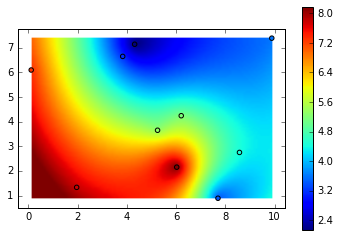

In [54]:
# Generate data:
x, y, z = 10 * np.random.random((3,10))

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()

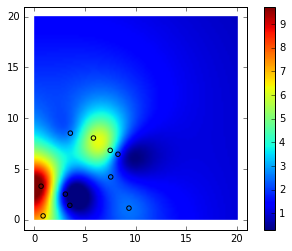

In [79]:
# Generate data:
x, y, z = 10 * np.random.random((3,10))

# Set up a regular grid of interpolation points
xi, yi = np.linspace(0, 20, 100), np.linspace(0, 20, 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[0, 20, 0, 20])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()

In [81]:
NX=160
NY=269
Xmeter=NX*50
Ymeter=NY*50
Xfeet=NX*50*3.28084
Yfeet=NY*50*3.28084
print (Xmeter, Ymeter, Xfeet, Yfeet)

8000 13450 26246.72 44127.298


In [82]:
XOFFSETf=34593.5206
YOFFSETf=119478.5687
XOFFSETm=XOFFSETf/3.28084
YOFFSETm=YOFFSETf/3.28084
theta=35

In [214]:
poro=pd.read_excel(r'log\poro.xlsx', 'poro')

In [215]:
poro.head(7)

,x,y,z,depth,poro,i,j
0,56437.3,126708.7,1,8182.5,16.050000,84,113
1,62366.5,134933.1,1,8693.4,12.733333,85,175
2,57550.5,118550.5,1,8941.4,12.500000,118,76
3,67901.6,142706.4,1,9092.5,12.980000,88,233
4,50105.3,129933.1,1,8886.1,16.785714,41,107
5,61411.7,124364.8,1,8949.9,15.425000,117,119
6,49852.4,117875.3,1,8984.1,13.080000,82,46


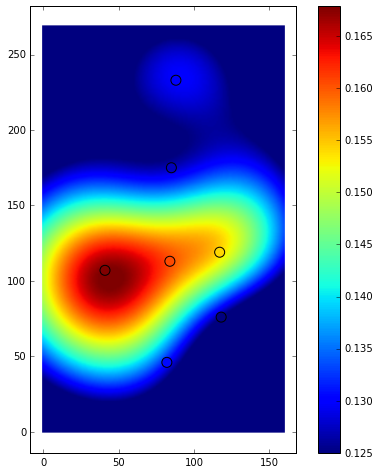

In [212]:
D1=poro[poro.z==1]
x=D1.i
y=D1.j
z=D1.poro/100

# Set up a regular grid of interpolation points
i, j = np.linspace(0, NX, NX), np.linspace(0, NY, NY)
#i, j = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
i, j = np.meshgrid(i, j)

# Interpolate
#rbf = scipy.interpolate.Rbf(x, y, z, function='thin_plate')
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse', epsilon=80)
#rbf = scipy.interpolate.Rbf(x, y, z, function='gaussian', epsilon=100)
zi = rbf(i, j)

plt.figure(figsize=(8,8))
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower', cmap='jet')
#plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z, s=100, cmap='jet')
plt.colorbar()


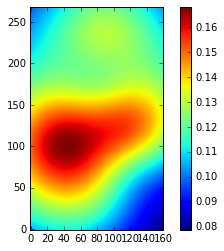

In [213]:
plt.imshow(zi)
plt.gca().invert_yaxis()
plt.colorbar()

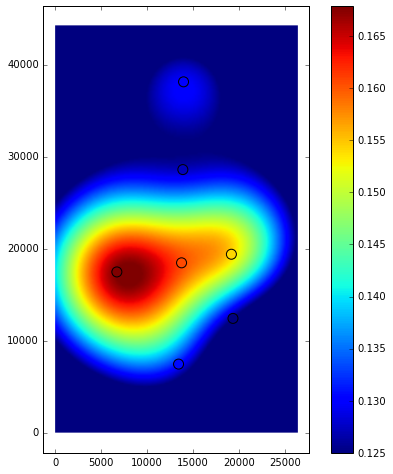

In [236]:
poro=poro.assign(
    x0f=np.cos(-theta/360*2*np.pi)*(poro.x-XOFFSETf)+np.sin(-theta/360*2*np.pi)*(poro.y-YOFFSETf),
    y0f=-np.sin(-theta/360*2*np.pi)*(poro.x-XOFFSETf)+np.cos(-theta/360*2*np.pi)*(poro.y-YOFFSETf),
)
D1=poro[poro.z==1]
x=D1.x0f
y=D1.y0f
z=D1.poro/100

# Set up a regular grid of interpolation points
i, j = np.linspace(0, Xfeet, NX), np.linspace(0, Yfeet, NY)
i, j = np.meshgrid(i, j)

rbf = scipy.interpolate.Rbf(x, y, z, function='inverse', epsilon=10000)
zi = rbf(i, j)

plt.figure(figsize=(8,8))
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',extent=[0, Xfeet, 0, Yfeet], cmap='jet')
plt.scatter(x, y, c=z, s=100, cmap='jet')

plt.colorbar()


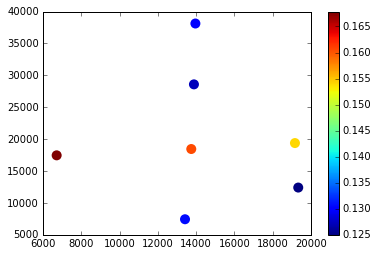

In [87]:
plt.scatter(x, y,c=z, s=100, edgecolors='none')
plt.colorbar()

In [88]:
# Set up a regular grid of interpolation points
i, j = np.linspace(0, Xfeet, NX), np.linspace(0, Yfeet, NY)
i, j = np.meshgrid(i, j)
# Set up a regular grid of interpolation points
#i, j = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
#i, j = np.meshgrid(i, j)

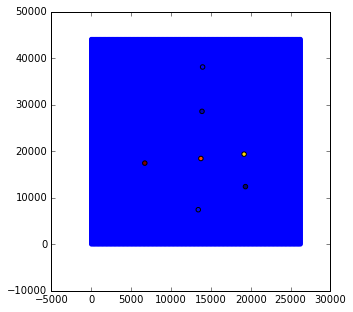

In [89]:
plt.figure(figsize=(5,5))
plt.scatter(i, j, edgecolors='none')
plt.scatter(x, y, c=z)

In [90]:
# Interpolate
#rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
rbf = scipy.interpolate.Rbf(x, y, z, function='inverse')
zi = rbf(i, j)

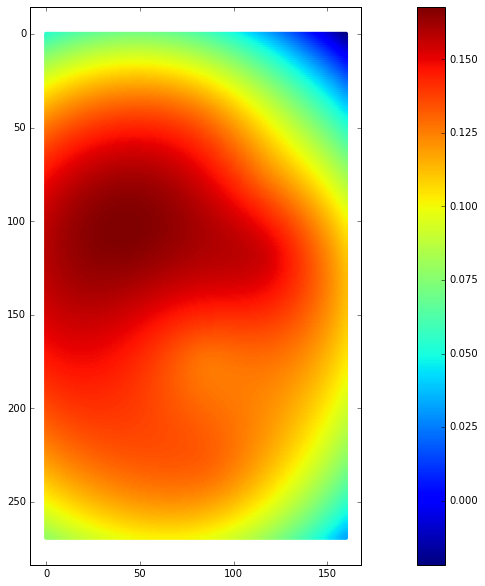

In [124]:
plt.figure(figsize=(20,10))
plt.imshow(zi)
#plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(i, j, c=zi, edgecolors='none')

plt.colorbar()
